<a href="https://colab.research.google.com/github/sophiasagan/Computer_Vision/blob/main/Brain_Tumor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2 as cv2
import tensorflow as tf 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
dataset = r'C:\Users\admin\Desktop\CV_Risav\D5\brain_tumor_dataset'
yes_path = r'C:\Users\admin\Desktop\CV_Risav\D5\brain_tumor_dataset\yes'
no_path = r'C:\Users\admin\Desktop\CV_Risav\D5\brain_tumor_dataset\no'



TypeError: ignored

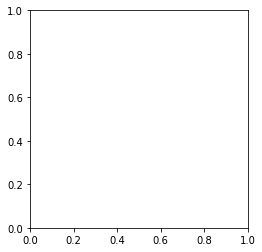

In [ ]:
img = cv2.imread(yes_path + "\\Y25.jpg")
plt.imshow(img)
print(img.shape)

In [ ]:
vals = [yes_path, no_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

155
98


In [ ]:
vals = [yes_path, no_path]
classes = ['yes', 'no']
filepath = []
labels = []
for i, j in zip(vals, classes):
    filelist = os.listdir(i)
    print(filelist)
    for name in filelist:
        x = os.path.join(i, name)
        filepath.append(x)
        labels.append(j)
print(filepath.__len__(), labels.__len__())

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [ ]:
filepath[-5:]

['C:\\Users\\USER\\Downloads\\MLI\\Images\\brain_tumor_dataset\\no\\No18.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\brain_tumor_dataset\\no\\No19.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\brain_tumor_dataset\\no\\No20.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\brain_tumor_dataset\\no\\No21.jpg',
 'C:\\Users\\USER\\Downloads\\MLI\\Images\\brain_tumor_dataset\\no\\No22.jpg']

In [ ]:
labels[-5:]

['no', 'no', 'no', 'no', 'no']

In [ ]:
datazipping = list(zip(filepath, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepath', 'labels'])

In [ ]:
pathframe.head()


,filepath,labels
0,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,yes
1,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,yes
2,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,yes
3,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,yes
4,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,yes


In [ ]:
pathframe.tail()

,filepath,labels
248,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,no
249,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,no
250,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,no
251,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,no
252,C:\Users\USER\Downloads\MLI\Images\brain_tumor...,no


In [ ]:
pathframe.__len__()

253

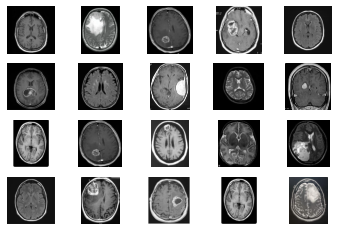

In [ ]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepath[vals]))
    plt.axis('off')
plt.show()

In [ ]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=42)
Train_new, valid = train_test_split(Train, train_size=0.90, random_state=42)
print(Train.shape, Train_new.shape, valid.shape, Test.shape)


(227, 2) (204, 2) (23, 2) (26, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.1, height_shift_range=0.1, 
                                   shear_range=0.1, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col='filepath', y_col='labels', batch_size=16,
                                             target_size=(150,150), class_mode='binary', shuffle=True)

test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='filepath', y_col='labels', batch_size=16,
                                            target_size=(150,150), class_mode='binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='filepath', y_col='labels', batch_size=16,
                                            target_size=(150,150), class_mode='binary', shuffle=True)

Found 204 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.


In [ ]:
print(train_gen[0][0].shape)

(16, 150, 150, 3)


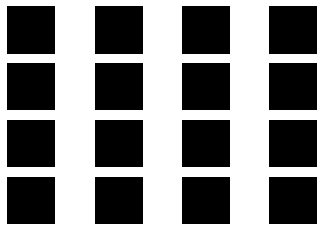

In [ ]:
for i in range(0, 16):
    val = train_gen[0][0][0]
    vals = val.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape=(150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_gen, validation_data=valid_gen, epochs=5, verbose=2)

Epoch 1/5
13/13 - 76s - loss: 0.7359 - accuracy: 0.7059 - val_loss: 30.0711 - val_accuracy: 0.6957
Epoch 2/5
13/13 - 65s - loss: 0.3386 - accuracy: 0.8529 - val_loss: 2.8966 - val_accuracy: 0.6087
Epoch 3/5
13/13 - 67s - loss: 0.2295 - accuracy: 0.9167 - val_loss: 1.8480 - val_accuracy: 0.6087
Epoch 4/5
13/13 - 66s - loss: 0.2363 - accuracy: 0.9412 - val_loss: 3.9162 - val_accuracy: 0.6957
Epoch 5/5
13/13 - 65s - loss: 0.1330 - accuracy: 0.9559 - val_loss: 1.8442 - val_accuracy: 0.6957
